In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/task2-datasett/automobile_data.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt


from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [3]:
df1=pd.read_csv("/kaggle/input/task2-datasett/automobile_data.csv")
df1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


# EDA and DATA  VISUALIZATION

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
df1.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Handling '?' in dataset by replacing them with nan so we can impute them later

In [7]:
input_df=df1.drop(['price'],axis=1)
target_df=df1['price']
input_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.4,23.0,106,4800,26,27


In [67]:
marks = input_df.columns[input_df.isin(['?']).any()]
marks

Index([], dtype='object')

In [68]:
input_df.replace('?', np.nan, inplace=True)
input_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm_5250.0,peak-rpm_5300.0,peak-rpm_5400.0,peak-rpm_5500.0,peak-rpm_5600.0,peak-rpm_5750.0,peak-rpm_5800.0,peak-rpm_5900.0,peak-rpm_6000.0,peak-rpm_6600.0
0,1.0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,0.058309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,0.058309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.6,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,0.230321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.8,164.0,audi,gas,std,four,sedan,fwd,front,0.384840,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.8,164.0,audi,gas,std,four,sedan,4wd,front,0.373178,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,95.0,volvo,gas,std,four,sedan,rwd,front,0.655977,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,0.2,95.0,volvo,gas,turbo,four,sedan,rwd,front,0.655977,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,0.2,95.0,volvo,gas,std,four,sedan,rwd,front,0.655977,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
203,0.2,95.0,volvo,diesel,turbo,four,sedan,rwd,front,0.655977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
numerical_columns = input_df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = input_df.select_dtypes(include=['object']).columns
# Create DataFrame for numerical and categorical columns
df_numerical = input_df[numerical_columns]

df_categorical = input_df[categorical_columns]
df_numerical


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22
...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,9.5,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,8.7,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,8.8,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,23.0,26,27


splitting the columns into input data cols and the target cols which well predict

Scaling all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005].

In [35]:
imputer = SimpleImputer().fit(input_df[['normalized-losses', 'bore', 'stroke', 'horsepower',
       'peak-rpm']])
input_df[['normalized-losses', 'bore', 'stroke', 'horsepower',
       'peak-rpm']] = imputer.transform(input_df[['normalized-losses', 'bore', 'stroke', 'horsepower',
       'peak-rpm']])

In [36]:
scaler = MinMaxScaler().fit(input_df[numerical_columns])
input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])
input_df[numerical_columns]


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.12500,0.222222,0.289474
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.12500,0.222222,0.289474
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.12500,0.166667,0.263158
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.18750,0.305556,0.368421
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.06250,0.138889,0.157895
...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.15625,0.277778,0.315789
201,0.2,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.10625,0.166667,0.236842
202,0.2,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.11250,0.138889,0.184211
203,0.2,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,1.00000,0.361111,0.289474


Categorical encoding

In [65]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(input_df[categorical_columns])
encoded_cols = list(encoder.get_feature_names_out(categorical_columns))
input_df[encoded_cols]=encoder.transform(input_df[categorical_columns])
input_df[encoded_cols]


,normalized-losses_65.0,normalized-losses_74.0,normalized-losses_77.0,normalized-losses_78.0,normalized-losses_81.0,normalized-losses_83.0,normalized-losses_85.0,normalized-losses_87.0,normalized-losses_89.0,normalized-losses_90.0,...,peak-rpm_5250.0,peak-rpm_5300.0,peak-rpm_5400.0,peak-rpm_5500.0,peak-rpm_5600.0,peak-rpm_5750.0,peak-rpm_5800.0,peak-rpm_5900.0,peak-rpm_6000.0,peak-rpm_6600.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Index([], dtype='object')

<Axes: >

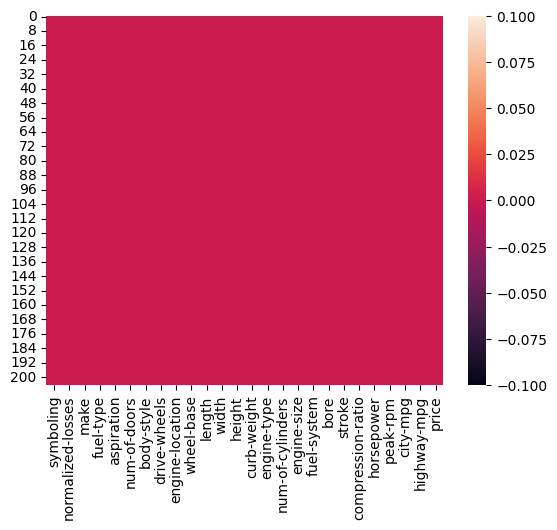

In [14]:
sns.heatmap(df1.isnull())

no missing values

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheel-base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb-weight'}>],
       [<Axes: title={'center': 'engine-size'}>,
        <Axes: title={'center': 'compression-ratio'}>,
        <Axes: title={'center': 'city-mpg'}>],
       [<Axes: title={'center': 'highway-mpg'}>, <Axes: >, <Axes: >]],
      dtype=object)

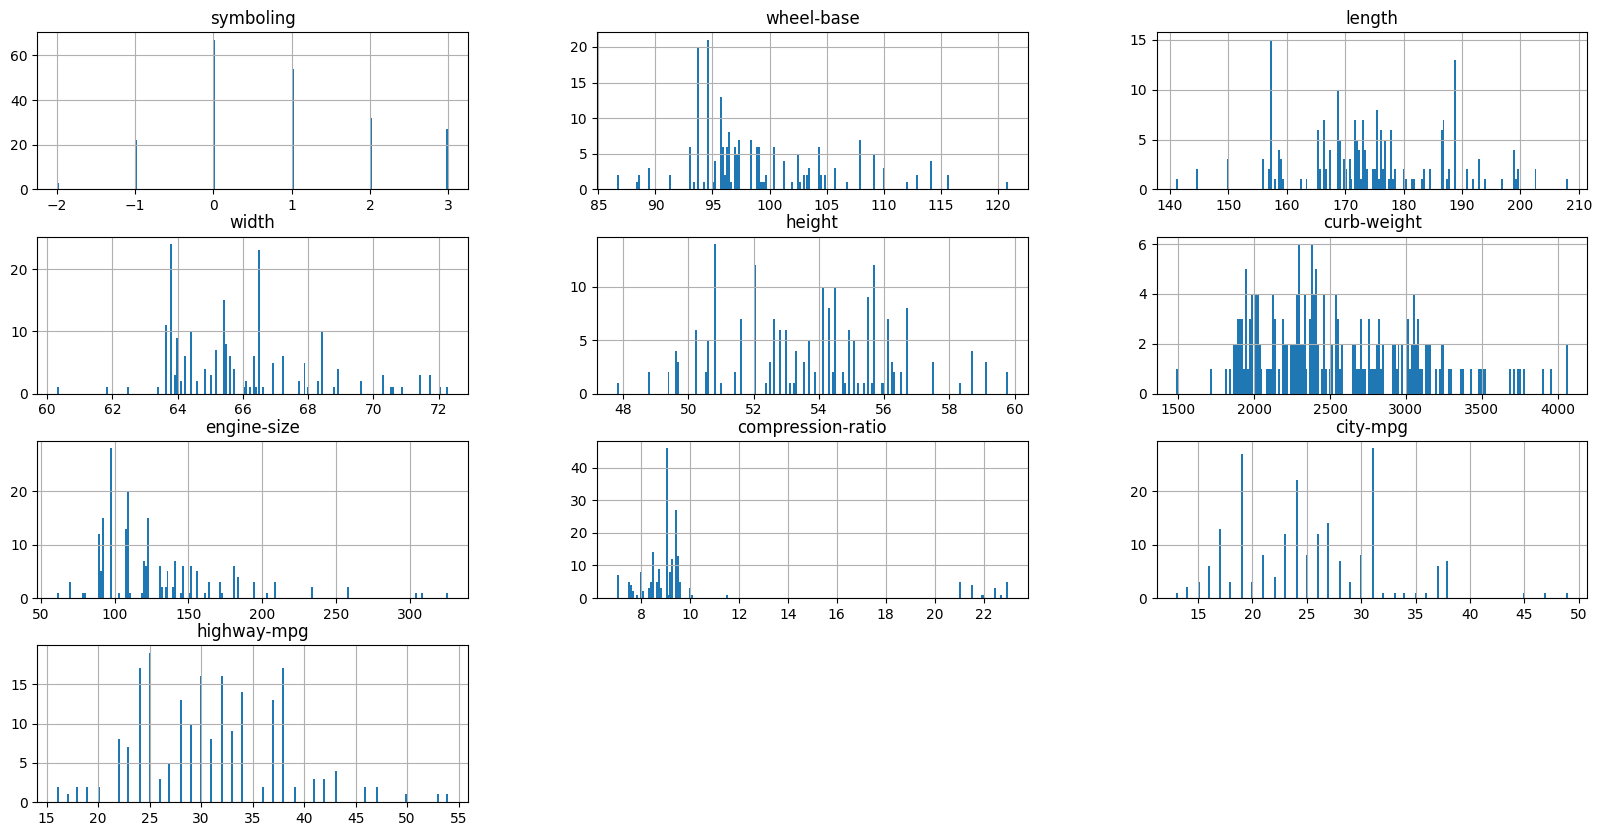

In [15]:
df1.hist(bins=200,figsize=[20,10])

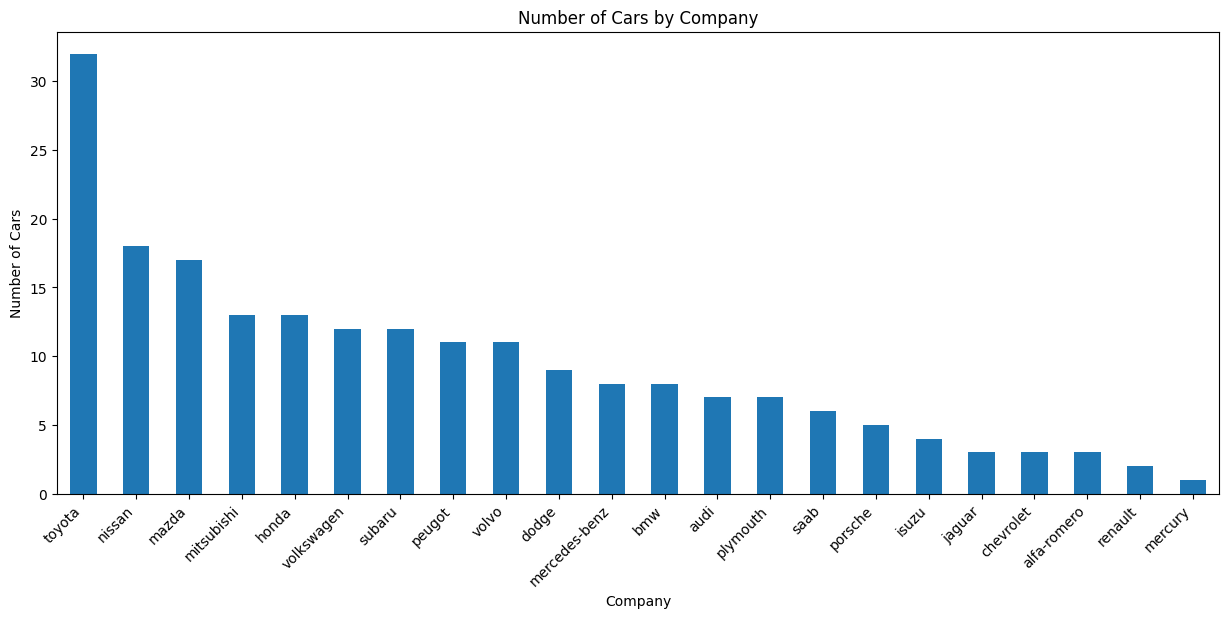

In [16]:

plt.figure(figsize=(15, 6))

# making bar plot of value count of cars by company
df1['make'].value_counts().plot(kind='bar')
# adding title and x and y axis labels
plt.title('Number of Cars by Company')
plt.xlabel('Company')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45, ha='right')
plt.show()

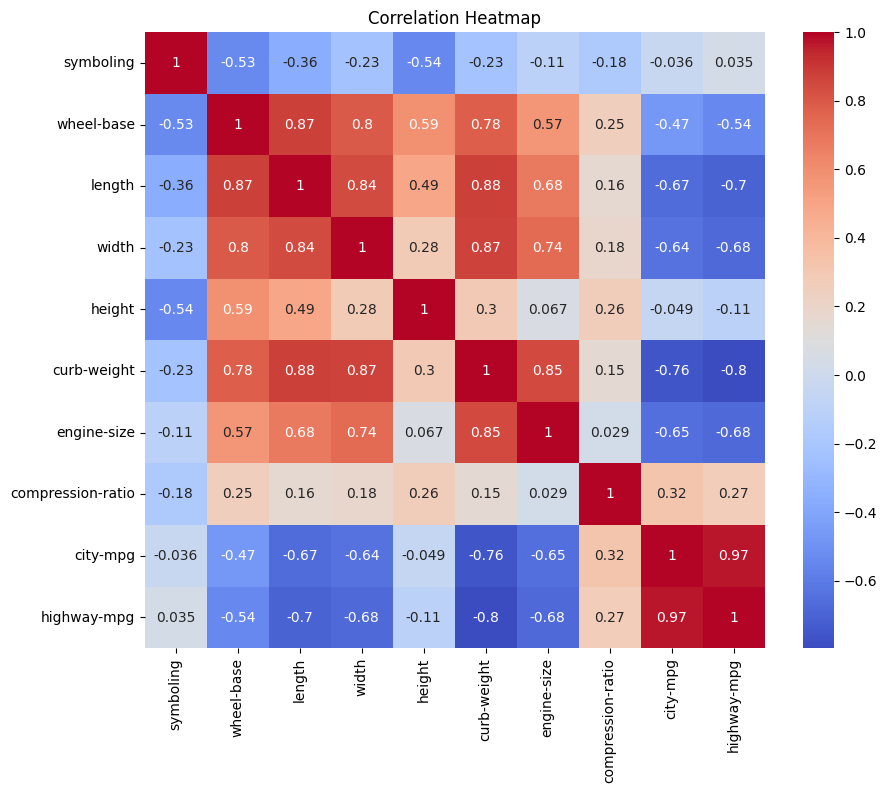

In [17]:
correlation_matrix = input_df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Principal Component Analysis

it uses linear projections of data to reduce their dimensions,while attempting to maximize the variance of data in the projection

For example, one could have an n-dimensional dataset, having n features, and reduce the dataset all the way down to 1-dimension by creating a feature consisting of just the first principal component. However, when it comes to making predictions one still need access to all of the original features so as to re-create the same principal component(s) to feed into the trained model. So, although PCA reduces the number of dimensions, it is not to be considered a feature elimination technique. It should be mentioned that PCA has notable limitations; the feature-mixtures in the components created by PCA become uninterpretable

In [40]:
input_df[['normalized-losses','bore', 'stroke', 'horsepower',
       'peak-rpm']].shape

(205, 5)

In [19]:
input_df[encoded_cols].shape

(205, 273)

In [45]:
cleaned_df = pd.concat([input_df[numerical_columns], input_df[encoded_cols]], axis=1)


In [48]:
cleaned1_df = pd.concat([input_df[['normalized-losses','bore', 'stroke', 'horsepower',
       'peak-rpm']], input_df[encoded_cols]], axis=1)


In [59]:
marks1 = cleaned1_df.columns[cleaned1_df.isin(['?']).any()]
marks1

Index([], dtype='object')

In [58]:
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(cleaned1_df)

In [60]:
print("Number of original features is {} and of reduced features is {}".format(cleaned_df.shape[1], x_reduced.shape[1]))

Number of original features is 278 and of reduced features is 2


# Train-Test split and model training

In [61]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(cleaned_df, target_df, test_size=0.1, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(x_reduced,target_df, test_size=0.1, random_state=42)

In [64]:
model1=LinearRegression()
model1.fit(X_train_clean,y_test_clean)

ValueError: could not convert string to float: '?'